#### Convolutional Neural Network

In [32]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [34]:
# Convolutional Neural Network
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,BatchNormalization
from tensorflow.keras.preprocessing import image

In [4]:
tf.__version__

'2.2.0'

In [5]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [6]:
training_set = train_datagen.flow_from_directory('Cotton Disease/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [7]:
training_set = train_datagen.flow_from_directory('Cotton Disease/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_datagen=ImageDataGenerator(rescale=1./255)
validation_set = val_datagen.flow_from_directory('Cotton Disease/val',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('Cotton Disease/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 1951 images belonging to 4 classes.
Found 253 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [8]:
# Part 2 - Building the CNN

# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(BatchNormalization())

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [9]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               5

In [49]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
model = cnn.fit(x = training_set, validation_data = validation_set, epochs = 10)

Epoch 1/10
61/61 [==============================] - 50s 816ms/step - loss: 0.2801 - accuracy: 0.9026 - val_loss: 0.8548 - val_accuracy: 0.6640
Epoch 2/10
61/61 [==============================] - 21s 341ms/step - loss: 0.2460 - accuracy: 0.9113 - val_loss: 0.4708 - val_accuracy: 0.7984
Epoch 3/10
61/61 [==============================] - 21s 338ms/step - loss: 0.2199 - accuracy: 0.9221 - val_loss: 0.5876 - val_accuracy: 0.8063
Epoch 4/10
61/61 [==============================] - 21s 339ms/step - loss: 0.2239 - accuracy: 0.9139 - val_loss: 2.4341 - val_accuracy: 0.4704
Epoch 5/10
61/61 [==============================] - 21s 340ms/step - loss: 0.1855 - accuracy: 0.9339 - val_loss: 1.3215 - val_accuracy: 0.6443
Epoch 6/10
61/61 [==============================] - 21s 344ms/step - loss: 0.1983 - accuracy: 0.9313 - val_loss: 0.8087 - val_accuracy: 0.7312
Epoch 7/10
61/61 [==============================] - 22s 355ms/step - loss: 0.1975 - accuracy: 0.9308 - val_loss: 3.7632 - val_accuracy: 0.4585

In [53]:
testresult = np.argmax(cnn.predict(test_set),axis=1)
testresult

array([1, 2, 1, 1, 1, 3, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 3, 0, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 3, 1, 1, 3, 1, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1], dtype=int64)

In [54]:
img = image.load_img("Cotton Disease/test/diseased cotton plant/dd (16)_iaip.jpg",target_size=(64,64))

Text(0.5, 0, 'Diseased cotton plant')

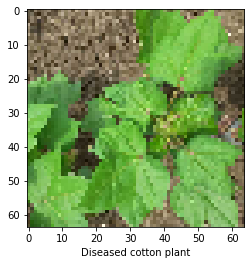

In [55]:
plt.imshow(img)
plt.xlabel("Diseased cotton plant")

In [56]:
# Part 4 - Making a single prediction
test_image = image.img_to_array(img)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [57]:
result = np.argmax(result,axis=1)

In [58]:
if result==0:
    print("diseased cotton leaf")
elif result==1:
    print("diseased cotton plant")
elif result==2:
    print("fresh cotton leaf")
elif result==3:
    print("fresh cotton plant")    

diseased cotton plant


In [1]:
## Model Evaluation

In [60]:
model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

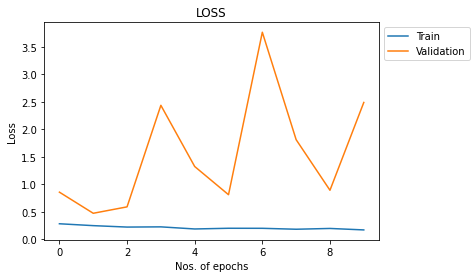

In [61]:
# LOSS 
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('LOSS')
plt.ylabel('Loss')
plt.xlabel('Nos. of epochs')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor = (1,1))
plt.show()

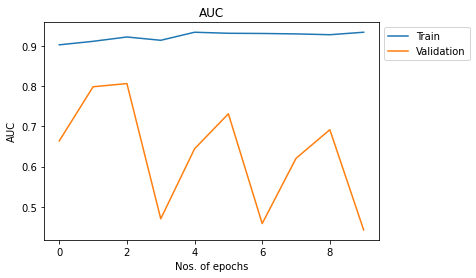

In [63]:
# AUC

plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('AUC')
plt.ylabel('AUC')
plt.xlabel('Nos. of epochs')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor = (1,1))
plt.show()